In [29]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

# 1.) Pull in Data and Convert to Monthly

In [30]:
apple_data = yf.download('AAPL')
df = apple_data.resample("M").last()[["Adj Close"]]

[*********************100%%**********************]  1 of 1 completed


# 2.) Create columns. 
  - Current Stock Price, Difference in stock price, Whether it went up or down over the next month,  option premium

In [45]:
#Difference in stock price (shift it up)
df["Diff"] = df["Adj Close"].diff().shift(-1)

#Whether it went Up/Down
df["Target"] = np.sign(df["Diff"])

#Option Premium
df["Premium"] = 0.08 * df["Adj Close"]

# 3.) Pull in X data, normalize and build a LogReg on column 2

In [33]:
X = pd.read_csv("Xdata.csv", index_col = "Date", parse_dates = ["Date"])

In [48]:
y = df.loc[:"2023-09-30","Target"].copy()
#Cut dataframe to match length of y
df = df.loc[:"2023-09-30",:].copy()

In [47]:
logreg = LogisticRegression().fit(X, y)
y_pred = logreg.predict(X)

# 4.) Add columns, prediction and profits.

In [46]:
df["Predictions"] = y_pred

#Calculate Profits
df["Profits"] = 0
#TP = all the times we were correct, we make our premium
df.loc[(df["Predictions"] == 1) & (df["Target"] == 1), "Profits"] = df["Premium"]
#FP
df.loc[(df["Predictions"] == 1) & (df["Target"] == -1), "Profits"] = 100*df["Diff"] + df["Premium"]

#TN and FN give us 0 profits bc we don't enter 

# 5.) Plot profits over time

<function matplotlib.pyplot.show(close=None, block=None)>

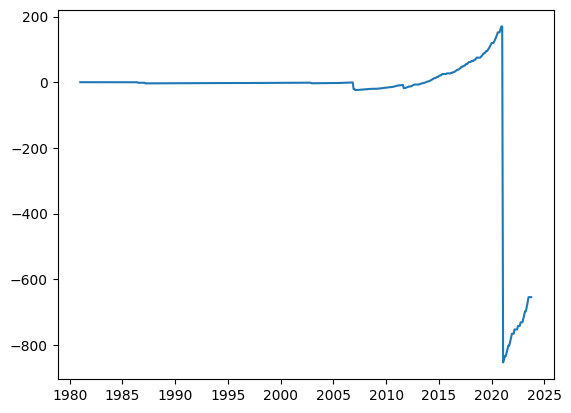

In [44]:
plt.plot(np.cumsum(df["Profits"]))
plt.show

We can see here the detriment is significantly more than our gain from being correct - we had a huge loss here, so this was not a good threshold.

# 5.5) Writeup for how our skills from the MQE could help Mr. Liu's ventures

The MQE program could provide us with skills to help optimize the ticket pricing strategy - or design algorithms to do so - so that, for example, The Arena's profits are increased. You could also try to optimize ticket pricing to attract influencers or even target particular users in order to incentivize them with greater opportunities to monetize their brand or build a platform. 

The program has also given us a number of data analysis skills, so you could help to identify certain characteristics of users on the platform that seem to attract greater engagement or even encourage other users to join, if you had a way to identify some kind of "chain reaction" or secondary users, to track this down the line engagement. Once identified, this could again be targeted in some way to see if there were certain ways that were most effective to generate new users, that The Arena could then try to take advantage of.

# 6.) Create a loop that stores total profits over time

# 7.) What is the optimal threshold and plot the total profits for this model.